This project is my first deep project
> Reference & Acknowledge : https://www.udemy.com/course/tensorflow-developer-certificate-machine-learning-zero-to-mastery

> Dataset : https://www.kaggle.com/competitions/digit-recognizer

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

train_dir = '/content/train.csv'
test_dir = '/content/test.csv'

# Load the training and test data
train_data = pd.read_csv(train_dir)
test_data = pd.read_csv(test_dir)

# Extracting labels and pixel values from training data
train_labels = train_data['label']
train_images = train_data.drop(labels='label', axis=1)

# Handle missing values with mean imputation
train_images.fillna(train_images.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

# Normalize pixel values
train_images = train_images / 255.0
test_images = test_data / 255.0

train_images = train_images.values.reshape(-1, 28, 28, 1)
test_images = test_images.values.reshape(-1, 28, 28, 1)  # Reshape test data similarly

# Convert labels to one-hot encoded vectors
num_labels = train_labels.nunique()
train_labels = tf.keras.utils.to_categorical(train_labels, num_labels)

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Define ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest'
)

# Create the CNN model
model_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(28, 28, 1)),
    Conv2D(10, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model using data augmentation and validation data
history_1 = model_1.fit(datagen.flow(train_images, train_labels, batch_size=32),
                         epochs=10,
                         validation_data=(val_images, val_labels))


Epoch 1/10
732/732 [==============================] - 54s 68ms/step - loss: 0.7869 - accuracy: 0.7472 - val_loss: 0.1976 - val_accuracy: 0.9431
Epoch 2/10
732/732 [==============================] - 53s 73ms/step - loss: 0.3236 - accuracy: 0.9017 - val_loss: 0.1436 - val_accuracy: 0.9586
Epoch 3/10
732/732 [==============================] - 41s 56ms/step - loss: 0.2591 - accuracy: 0.9229 - val_loss: 0.1197 - val_accuracy: 0.9660
Epoch 4/10
732/732 [==============================] - 45s 62ms/step - loss: 0.2289 - accuracy: 0.9295 - val_loss: 0.0968 - val_accuracy: 0.9710
Epoch 5/10
732/732 [==============================] - 43s 58ms/step - loss: 0.1854 - accuracy: 0.9430 - val_loss: 0.1025 - val_accuracy: 0.9674
Epoch 6/10
732/732 [==============================] - 42s 57ms/step - loss: 0.1770 - accuracy: 0.9468 - val_loss: 0.0783 - val_accuracy: 0.9754
Epoch 7/10
732/732 [==============================] - 43s 59ms/step - loss: 0.1675 - accuracy: 0.9507 - val_loss: 0.0939 - val_accuracy:

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

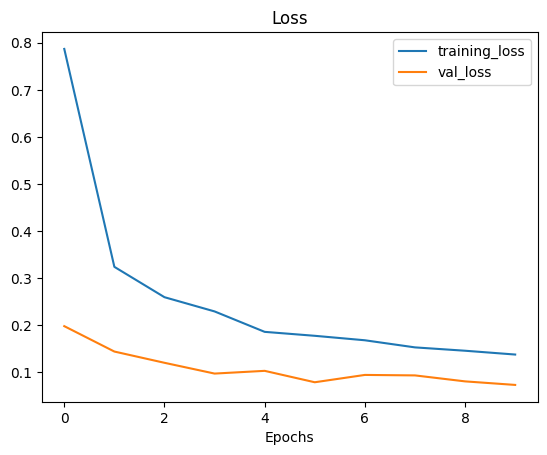

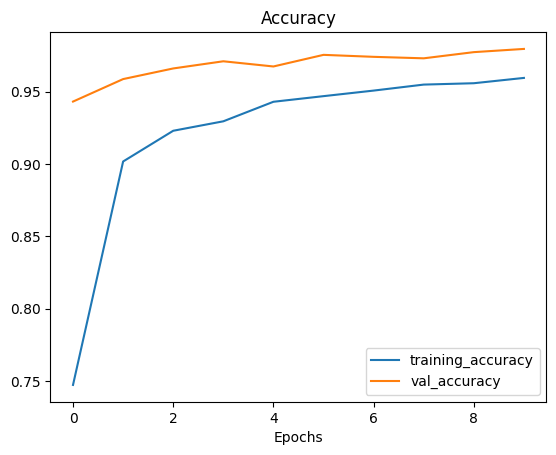

In [ ]:
plot_loss_curves(history_1)

In [ ]:
# Make predictions
y_probs = model_1.predict(test_images)

# View the first 5 predictions
print(y_probs[:5])

875/875 [==============================] - 8s 9ms/step
[[2.12621885e-08 9.29370513e-13 9.99979556e-01 1.53097262e-05
  5.00576698e-11 2.87007390e-10 2.64312686e-11 3.33820844e-06
  1.73696219e-06 5.18439632e-11]
 [9.99988019e-01 5.16001629e-14 1.05565641e-05 3.27312089e-09
  9.26995636e-09 2.38869173e-08 5.38948484e-07 4.93207395e-08
  1.32596753e-07 6.34721687e-07]
 [1.37166217e-05 2.49271693e-07 1.03646133e-04 7.19747972e-04
  1.01466815e-03 1.03583425e-05 2.80792364e-07 5.98284649e-04
  6.45602960e-03 9.91083086e-01]
 [9.69238698e-01 1.26877171e-06 2.58106110e-03 1.02069600e-04
  5.63710346e-05 9.97741699e-06 1.14850979e-02 2.22796822e-04
  5.17236674e-03 1.11303004e-02]
 [6.82727763e-10 3.23510695e-13 1.78370043e-03 9.98208880e-01
  1.39693853e-13 3.18860938e-10 3.86780824e-15 2.98191566e-07
  6.88333284e-06 1.56348619e-07]]


In [ ]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), train_labels[y_probs[0].argmax()]

(2, array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32))

In [ ]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([2, 0, 9, 0, 3, 7, 0, 3, 0, 3])

875/875 [==============================] - 12s 13ms/step


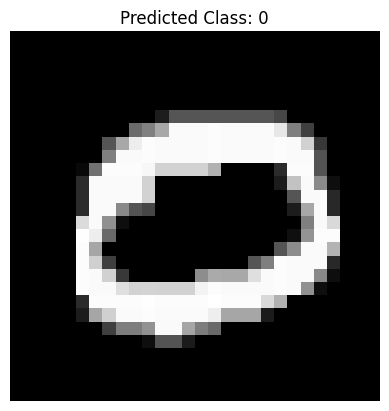

In [ ]:
# Predict on test data
predictions = model_1.predict(test_images)

# Get the predicted class for the first test image
index = 1  # Change this index to visualize different images
first_prediction = predictions[index]
predicted_class = np.argmax(first_prediction)

# Display the image
plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()